### Datasets

* Covid19 - 
Cumulative count of confirmed, cured and deceased cases with Nationality (30th Jan,2020 to present)

* Individuals -
Details of individuals diagnosed with Covid19 (30th Jan,2020 to present)

In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/features-covid/statewise_features.csv
/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv
/kaggle/input/covid19-in-india/HospitalBedsIndia.csv
/kaggle/input/covid19-in-india/covid_19_india.csv
/kaggle/input/covid19-in-india/population_india_census2011.csv
/kaggle/input/covid19-in-india/ICMRTestingLabs.csv
/kaggle/input/covid19-in-india/IndividualDetails.csv
/kaggle/input/covid19-in-india/AgeGroupDetails.csv


In [2]:
# Import datasets

individuals_df = pd.read_csv("/kaggle/input/covid19-in-india/IndividualDetails.csv", index_col=0)
covid_df = pd.read_csv("/kaggle/input/covid19-in-india/covid_19_india.csv", index_col=0).drop('Time', axis=1)
covid_features_df = pd.read_csv("/kaggle/input/features-covid/statewise_features.csv")

In [3]:
individuals_df.head()

,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
id,,,,,,,,,,,
0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


### Exploring Positive case individuals

In [4]:
individuals_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28182 entries, 0 to 28182
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   government_id       2997 non-null   object
 1   diagnosed_date      28182 non-null  object
 2   age                 2346 non-null   object
 3   gender              5313 non-null   object
 4   detected_city       2350 non-null   object
 5   detected_district   21198 non-null  object
 6   detected_state      28182 non-null  object
 7   nationality         2709 non-null   object
 8   current_status      28182 non-null  object
 9   status_change_date  27780 non-null  object
 10  notes               26847 non-null  object
dtypes: object(11)
memory usage: 2.6+ MB


In [5]:
individuals_df['current_status'].unique()

array(['Recovered', 'Hospitalized', 'Deceased', 'Migrated'], dtype=object)

In [6]:
# Time span of this dataset
individuals_df['diagnosed_date'] = pd.to_datetime(individuals_df['diagnosed_date'], format="%d/%m/%Y")
individuals_df['diagnosed_date'].min(), individuals_df['diagnosed_date'].max()

(Timestamp('2020-01-30 00:00:00'), Timestamp('2020-04-26 00:00:00'))

### Distribution of infected cases w.r.t age

In [7]:
# Casting age to numeric 

cases_data = individuals_df[pd.to_numeric(individuals_df['age'], errors='coerce').notnull()]
cases_data['age'] = pd.to_numeric(cases_data['age'])
cases_data['age'].describe()

count    2342.000000
mean       38.488557
std        17.265748
min         0.300000
25%        26.000000
50%        36.000000
75%        50.000000
max        98.000000
Name: age, dtype: float64

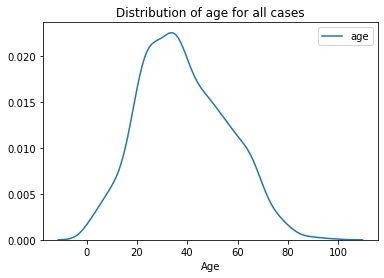

In [8]:
plt.figure(figsize=(6,4))
sns.kdeplot(cases_data['age'])
plt.title("Distribution of age for all cases")
plt.xlabel("Age")
plt.show()

The above reflects the distribution of ages of the overall population of India since we are considering all the individuals who have been diagnosed with Covid. Since, this count is quite high, people of all ages have chances of getting *affected* by the disease.

However, the distribution of age will be different for other cases where the individual has recovered or couldn't make it *after* getting affected. This distribution can hint us about specific age groups that are associated with particular outcome later.

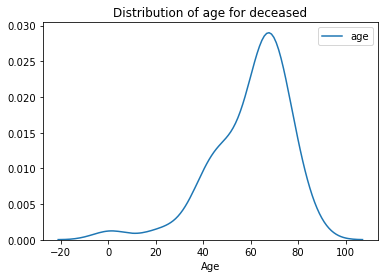

In [9]:
plt.figure(figsize=(6,4))
sns.kdeplot(cases_data[cases_data['current_status']=='Deceased']['age'])
plt.title("Distribution of age for deceased")
plt.xlabel("Age")
plt.show()

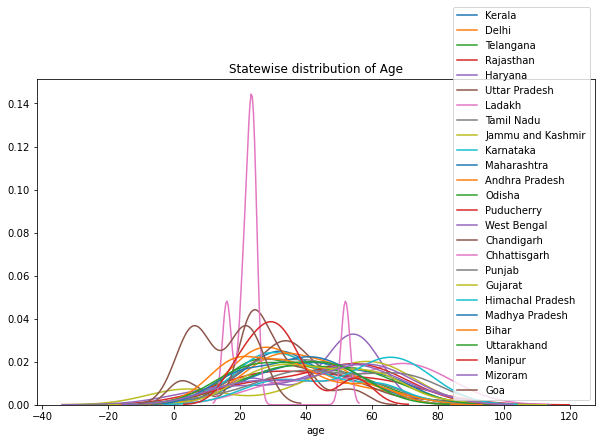

In [10]:
plt.figure(figsize=(10,6))
for state in cases_data['detected_state'].unique():
    subset = cases_data[cases_data['detected_state']==state]
    if subset.count()['current_status'] > 1:
        sns.kdeplot(subset['age'])
plt.title("Statewise distribution of Age")
plt.xlabel("age")
plt.legend(cases_data['detected_state'].unique())
plt.show()

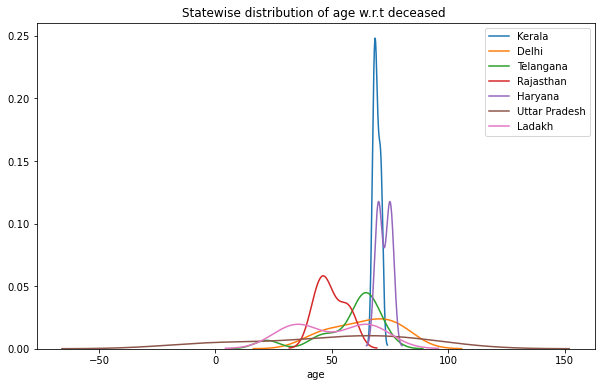

In [11]:
plt.figure(figsize=(10,6))
for state in cases_data['detected_state'].unique():
    subset = cases_data[cases_data['detected_state']==state]
    deceased_subset = subset[subset['current_status']=='Deceased']
    if deceased_subset.count()['current_status'] > 1:
        sns.kdeplot(subset[subset['current_status']=='Deceased']['age'])
plt.title("Statewise distribution of age w.r.t deceased ")
plt.xlabel("age")
plt.legend(cases_data['detected_state'].unique())
plt.show()

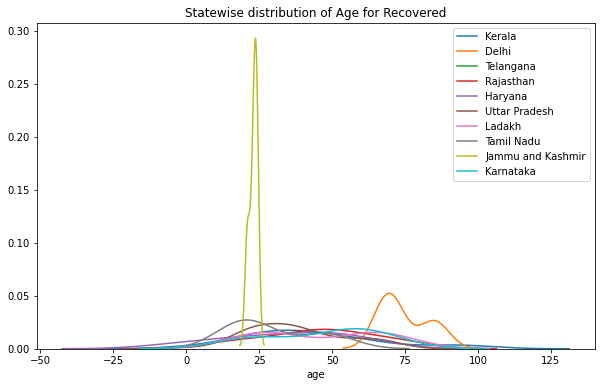

In [12]:
plt.figure(figsize=(10,6))
for state in cases_data['detected_state'].unique():
    subset = cases_data[cases_data['detected_state']==state]
    deceased_subset = subset[subset['current_status']=='Recovered']
    if deceased_subset.count()['current_status'] > 1:
        sns.kdeplot(subset[subset['current_status']=='Recovered']['age'])
plt.title("Statewise distribution of Age for Recovered")
plt.xlabel("age")
plt.legend(cases_data['detected_state'].unique())
plt.show()

### Statewise testing data

In [13]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format="%d/%m/%y")

covid_df['Date'].min(), covid_df['Date'].max()

(Timestamp('2020-01-30 00:00:00'), Timestamp('2020-06-05 00:00:00'))

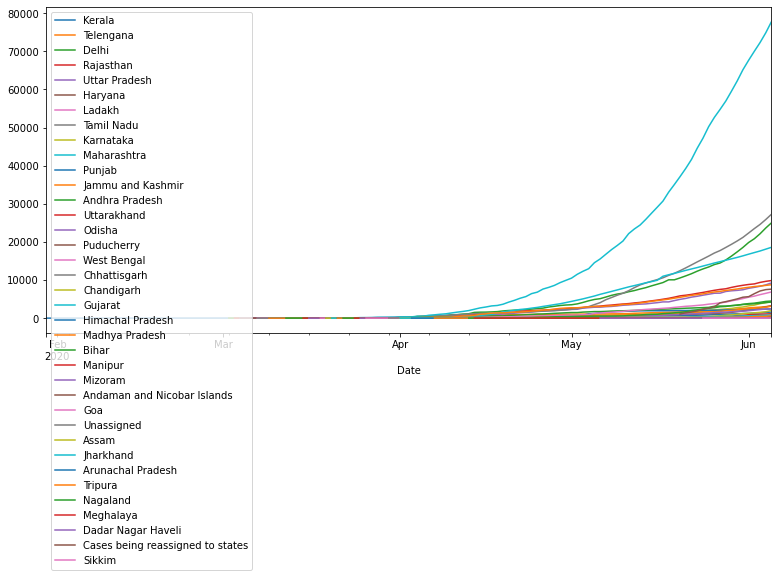

In [14]:
plt.figure(figsize=(13,6))
for state in covid_df['State/UnionTerritory'].unique():
    covid_df[covid_df['State/UnionTerritory']==state].set_index('Date')['Confirmed'].plot()
plt.legend(covid_df['State/UnionTerritory'].unique())
plt.show()

Above increasing trend is due to the cumulative count of cases so far.
To know the trend of cases arising everyday, we will will derive the No. of new cases, fatalities and recoveries at daily level.

In [15]:
covid_df.count()

Date                        2702
State/UnionTerritory        2702
ConfirmedIndianNational     2702
ConfirmedForeignNational    2702
Cured                       2702
Deaths                      2702
Confirmed                   2702
dtype: int64

In [16]:
covid_daily_df = None
for state in covid_df['State/UnionTerritory'].unique():
    covid_data_state = covid_df[covid_df['State/UnionTerritory']==state]
    covid_data_state['previous_day'] = covid_data_state['Confirmed'].shift(1)
    covid_data_state['new_cases'] = covid_data_state['Confirmed'] - covid_data_state['previous_day']

    covid_data_state['previous_day'] = covid_data_state['Deaths'].shift(1)
    covid_data_state['fatalities'] = covid_data_state['Deaths'] - covid_data_state['previous_day']

    covid_data_state['previous_day'] = covid_data_state['Cured'].shift(1)
    covid_data_state['recoveries'] = covid_data_state['Cured'] - covid_data_state['previous_day']

    covid_data_state = covid_data_state.drop('previous_day',axis=1)
    covid_daily_df = pd.concat([covid_daily_df, covid_data_state], axis=0)
    
covid_daily_df.set_index('Date', inplace=True)

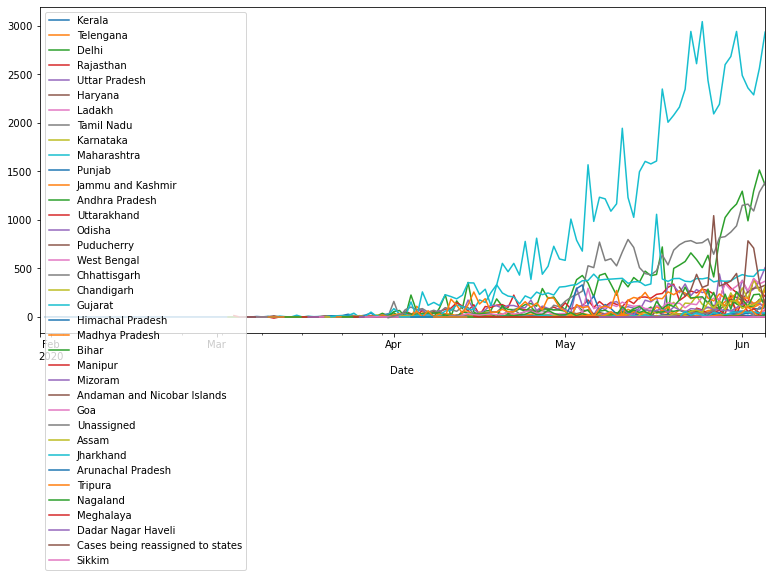

In [17]:
samples = 0
labels = covid_daily_df.reset_index()['Date']
x_pos = np.arange(len(labels))
plt.figure(figsize=(13,6))

for state in covid_daily_df['State/UnionTerritory'].unique():    
    covid_daily_df[covid_daily_df['State/UnionTerritory']==state]['new_cases'].plot()
    
plt.legend(covid_daily_df['State/UnionTerritory'].unique(), loc='upper left')
plt.show()

In [18]:
covid_data_state[-6:-4]

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,new_cases,fatalities,recoveries
Sno,,,,,,,,,,
2515,2020-05-31,Sikkim,-,-,0,0,1,0.0,0.0,0.0
2551,2020-06-01,Sikkim,-,-,0,0,1,0.0,0.0,0.0


According to the media, the huge spike recorded on 30th May is because of reporting the fatalities that took over a period of time in the past all at once as a aggregated figure for a single day. Hence, we see the spike.

https://theprint.in/india/82-coronavirus-deaths-added-to-delhis-toll-in-last-24-hours-deputy-cm-manish-sisodia/431678/

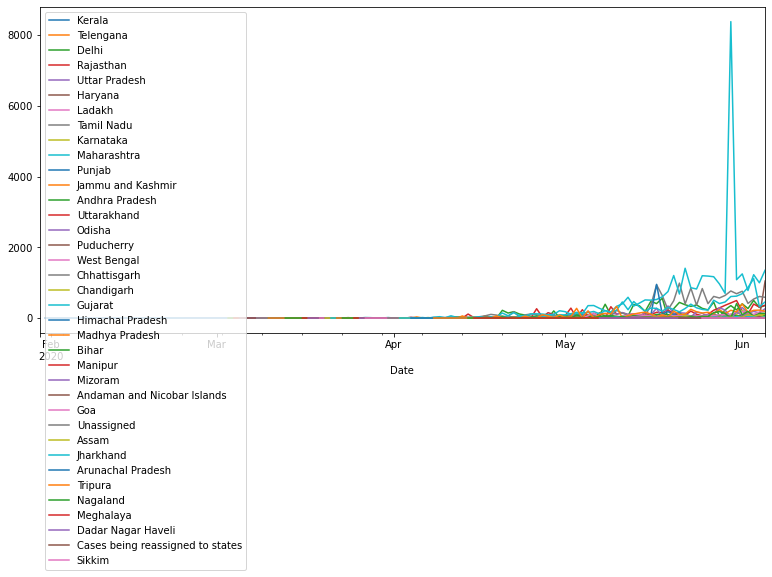

In [19]:
samples = 0
labels = covid_daily_df.reset_index()['Date']
x_pos = np.arange(len(labels))
plt.figure(figsize=(13,6))

for state in covid_daily_df['State/UnionTerritory'].unique():    
    covid_daily_df[covid_daily_df['State/UnionTerritory']==state]['recoveries'].plot()
    
plt.legend(covid_daily_df['State/UnionTerritory'].unique(), loc='upper left')
plt.show()

In [20]:
states = covid_daily_df['State/UnionTerritory'].unique()

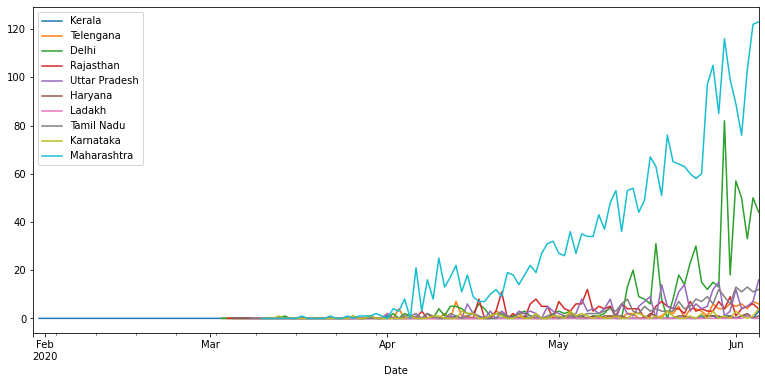

In [21]:
samples = 0
labels = covid_daily_df.reset_index()['Date']
x_pos = np.arange(len(labels))
plt.figure(figsize=(13,6))

for state in states[:10]:    
    covid_daily_df[covid_daily_df['State/UnionTerritory']==state]['fatalities'].plot()
    
plt.legend(states[:10], loc='upper left')
plt.show()

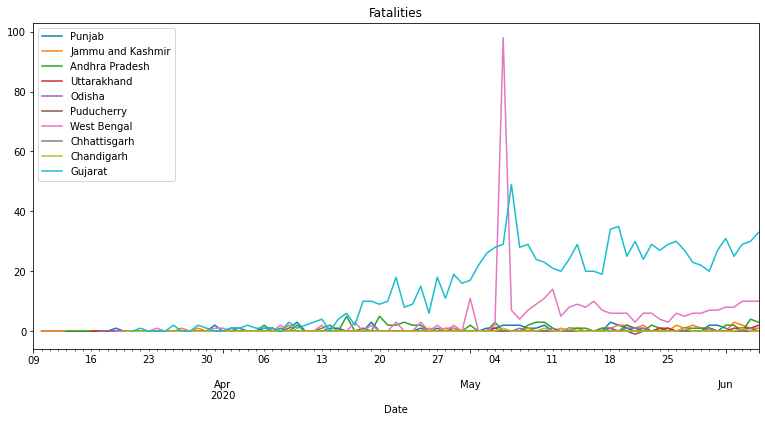

In [22]:
samples = 0
labels = covid_daily_df.reset_index()['Date']
x_pos = np.arange(len(labels))
plt.figure(figsize=(13,6))

for state in states[10:20]:    
    covid_daily_df[covid_daily_df['State/UnionTerritory']==state]['fatalities'].plot()
plt.legend(states[10:20], loc='upper left')
plt.title("Fatalities")
plt.show()

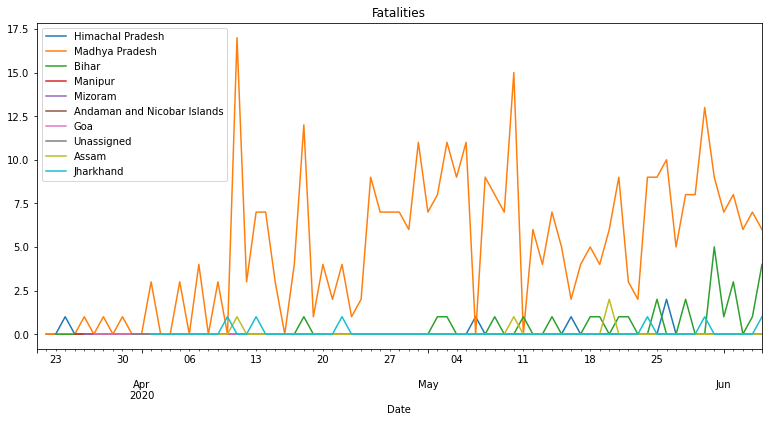

In [23]:
samples = 0
labels = covid_daily_df.reset_index()['Date']
x_pos = np.arange(len(labels))
plt.figure(figsize=(13,6))

for state in states[20:30]:    
    covid_daily_df[covid_daily_df['State/UnionTerritory']==state]['fatalities'].plot()
plt.legend(states[20:30], loc='upper left')
plt.title("Fatalities")
plt.show()

The following states have 0 fatality till present except for the state Meghalaya with a single case reported on 15th April.

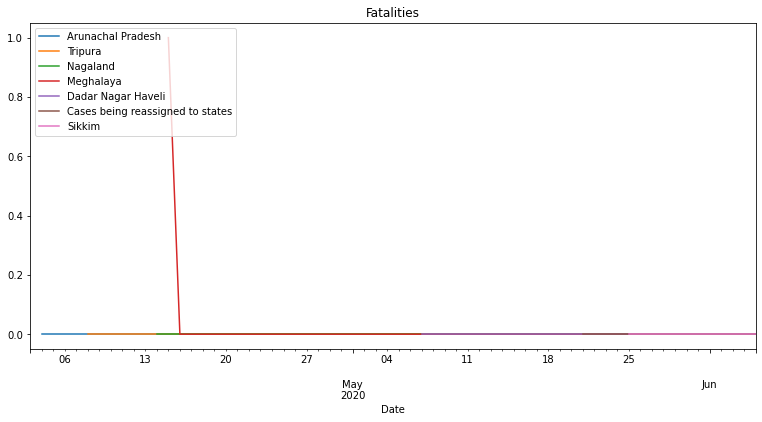

In [24]:
samples = 0
labels = covid_daily_df.reset_index()['Date']
x_pos = np.arange(len(labels))
plt.figure(figsize=(13,6))

for state in states[30:]:    
    covid_daily_df[covid_daily_df['State/UnionTerritory']==state]['fatalities'].plot()
plt.legend(states[30:], loc='upper left')
plt.title("Fatalities")
plt.show()

In [25]:
covid_features_df.head()

,Date,State,pop_density,new_cases,samples_tested
0,2020-04-24,Andaman and Nicobar Islands,46.0,15.0,1276.0
1,2020-04-27,Andaman and Nicobar Islands,46.0,6.0,169.0
2,2020-05-01,Andaman and Nicobar Islands,46.0,0.0,906.0
3,2020-05-16,Andaman and Nicobar Islands,46.0,0.0,2923.0
4,2020-05-22,Andaman and Nicobar Islands,46.0,0.0,586.0


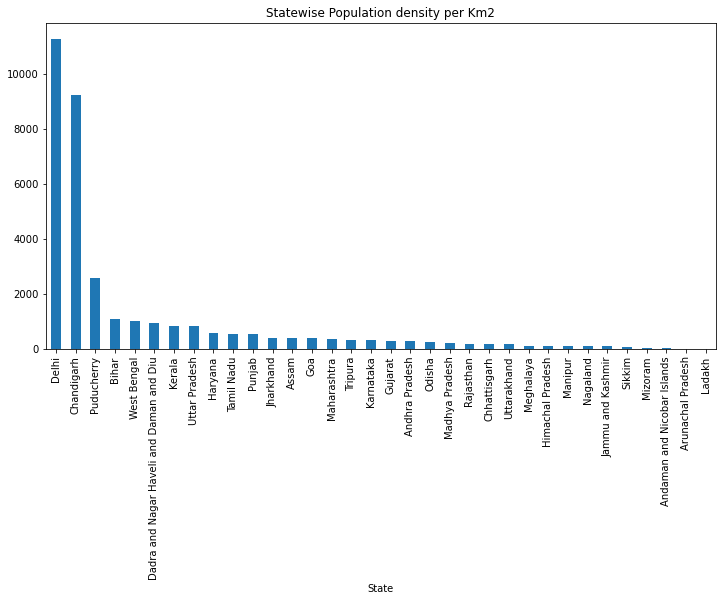

In [26]:
plt.figure(figsize=(12,6))
covid_features_df.groupby("State").max().sort_values("pop_density", ascending=False)['pop_density'].plot(kind='bar')
plt.title("Statewise Population density per Km2")
plt.show()